# AFIF JETHAM
### Grip @ The Spark Foundation
### Task 2 - Prediction using Unsupervised ML
### ***K-Means Clustering***
In this Task we have to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset. We will be using K-Means Clustering. 

In [237]:
# importing all the important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [238]:
# reading the data
data = pd.read_csv('Iris.csv')

In [239]:
# head of the data
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [240]:
# Dropping ID as it may reflect on the results
data.drop('Id', axis = 1, inplace = True)

In [241]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [242]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [243]:
# Creating variable x without string in it.
x = data.iloc[:, 0:4].values

In [244]:
pd.DataFrame(x).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Importing and creating a KMeans Cluster**

In [245]:
# importing KMeans Cluster
from sklearn.cluster import KMeans

In [246]:
# initially we are taking 2 clusters randomly to check the inertia
kmeans = KMeans(n_clusters = 2)

In [247]:
kmeans.fit(x)

KMeans(n_clusters=2)

**Now that we have fitted the data in our algorithm, Its time to make some predictions.**

In [248]:
pred = kmeans.predict(x)

In [249]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [250]:
pd.Series(pred).value_counts()

0    97
1    53
dtype: int64

In [251]:
kmeans.inertia_     # this is the inertia for 2 clusters

152.36870647733915

In [252]:
kmeans.score(x)

-152.36870647733912

**As we can see that the inertia is still high, and to check if we can get the inertia less than it and to find the optimum number of clusters we will create more clusters and check their inertia**

In [253]:
SSE = []

In [254]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters =  cluster)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

In [255]:
frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})

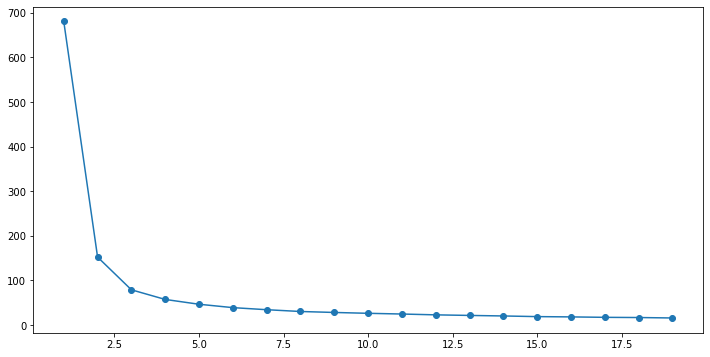

In [256]:
# Visualizing the Clusters with their respected Inertias
plt.figure(figsize = (12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')

**As we can see that there is no significant amount of drop after the 3rd cluster, So we will visualize and check by creating 3 clusters**

In [257]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3)
kmeans.fit(x)
pred = kmeans.predict(x)

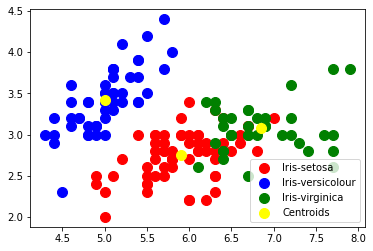

In [258]:
# Creating a Scatter Plot with the Centroids to check if the clustering is good
plt.scatter(x[pred == 0,0], x[pred == 0,1],
           s =100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1,0], x[pred == 1,1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2,0], x[pred == 2,1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [259]:
kmeans.inertia_

78.94084142614601

As we can see that the clusters are not that accurate, So we can do some preprocessing on our data and repeat testing the model for the better accuracy

In [260]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
data_scaled = scaler.fit_transform(x)

In [261]:
pd.DataFrame(data_scaled).head()

,0,1,2,3
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


In [262]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.751621,0.404780,0.454958,0.140965
std,0.044619,0.105087,0.159747,0.078136
min,0.653877,0.238392,0.167836,0.014727
25%,0.715261,0.326738,0.250925,0.048734
50%,0.754883,0.354371,0.536367,0.164148
75%,0.788419,0.525237,0.580025,0.197532
max,0.860939,0.607125,0.636981,0.280419


In [263]:
SSE_scaled = []

In [264]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

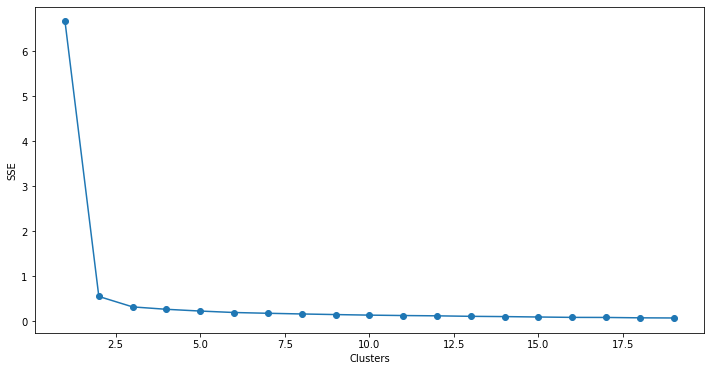

In [265]:
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE': SSE_scaled})
plt.figure(figsize = (12,6))
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker = "o")
plt.xlabel("Clusters")
plt.ylabel("SSE")

**We can notice that there is drastically heavy drop at the inertias of the respective clusters after the preprocessing**

In [266]:
# Taking 3 Clusters on the preprocessed data
kmeans = KMeans(n_jobs = -1, n_clusters = 3)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [267]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [268]:
pd.Series(pred).value_counts()

1    55
0    50
2    45
dtype: int64

In [269]:
frame = pd.DataFrame(data_scaled)

In [270]:
frame['cluster'] = pred

In [271]:
frame.loc[frame['cluster']==2, :].head(10)

,0,1,2,3,cluster
50,0.767011,0.350634,0.514993,0.153402,2
51,0.745498,0.372749,0.524178,0.174726,2
52,0.755193,0.339290,0.536296,0.164172,2
53,0.753849,0.315246,0.548254,0.178183,2
54,0.758175,0.326599,0.536555,0.174964,2
55,0.722330,0.354829,0.570260,0.164742,2
56,0.726348,0.380468,0.541879,0.184469,2
57,0.759165,0.371836,0.511275,0.154932,2
58,0.763019,0.335266,0.531801,0.150292,2
59,0.724602,0.376236,0.543452,0.195085,2


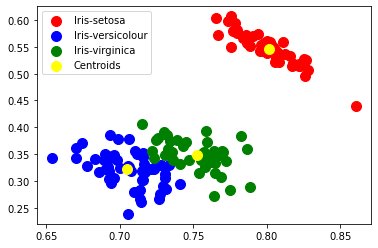

In [272]:
plt.scatter(data_scaled[pred == 0,0], data_scaled[pred == 0,1],
           s =100, c = 'red', label = 'Iris-setosa')
plt.scatter(data_scaled[pred == 1,0], data_scaled[pred == 1,1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data_scaled[pred == 2,0], data_scaled[pred == 2,1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [273]:
kmeans.inertia_

0.3232076454434727

We can notice that using 3 Clusters after preprocessing gives more better results and makes more sense than before preprocessing.

### Result

**The optimum number of clusters are 3 in our data as it gives better results than other clusters.**

***Thankyou***